In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import pyarrow

pre_trained = True

In [2]:

def distance_canberra_mat(d1, d2):
    ### Don't seems to work in scipy    
    divide = abs(d1) + abs(d2)    
    distance = np.sum(np.divide(abs(d1-d2), divide, where=divide!=0), axis=1)    
    return distance
    
def distance_cosine_mat(d1, d2):
    ### Don't seems to work in scipy
    val = np.sum(d1*d2, axis=1)
    divide = np.sqrt(np.sum((d1*d1), axis=1))*np.sqrt(np.sum((d2*d2), axis=1))
    return 1 - np.divide(val, divide)

def distance_khi2_mat(d1, d2):
    divide = d1 + d2    
    distance = np.sum(np.divide((d1-d2)**2, divide, where=divide!=0), axis=1)   
    return distance


def distance_braycurtis_mat(d1, d2):
    divide = np.sum(abs(d1 + d2), axis=1)
    distance = np.divide(np.sum(abs(d1-d2), axis=1), divide)   
    return distance


def distance_eucl_mat(d1, d2):
    distance = np.sqrt(np.sum((d1-d2)**2, axis=1))   
    return distance

In [3]:
train_data = None


if(pre_trained==False) :
    xtrain=pd.read_csv("data/xtrain_challenge.csv")
    ytrain=pd.read_csv("data/ytrain_challenge.csv")
    train_data = xtrain
    train_data["label"] = ytrain
    
    cols_qs = list(xtrain.columns)[:13]
    cols_qr = list(xtrain.columns)[13:26]
    cols_S1_11 = list(xtrain.columns)[26:37]
    label = ["label"]


    # On créé des features artificielles:
    # Q1-13 Q13-26 sont des identifiants uniques d'un visage
    # On suppose que Q1-13 et Q13-26 pourrait etre inversé
    # On regarde si on n'aurait pas des liaisons à faire en plus

    # Merge des colonnes

    train_data["QS"] = train_data[cols_qs].apply(
        lambda x: '_'.join(x.astype(str)),
        axis=1
    )

    # Merge des colonnes

    train_data["QR"] = train_data[cols_qr].apply(
        lambda x: '_'.join(x.astype(str)),
        axis=1
    )
    train_data.to_csv("data/train_with_ids.csv")
else:
    train_data = pd.read_csv("data/xtrain_challenge.csv")
  
    
cols_qs = list(train_data.columns)[:13]
cols_qr = list(train_data.columns)[13:26]
cols_S1_11 = list(train_data.columns)[26:37]
    

In [4]:
train_data["canberra"]=distance_canberra_mat(train_data[cols_qr].values, train_data[cols_qs].values)
train_data["cosine"]=distance_cosine_mat(train_data[cols_qr].values, train_data[cols_qs].values)
train_data["khi2"]=distance_khi2_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["braycurtis"]=distance_braycurtis_mat(train_data[cols_qr].values,train_data[cols_qs].values)
train_data["euclidian"]=distance_eucl_mat(train_data[cols_qr].values,train_data[cols_qs].values)
ytrain=pd.read_csv("data/ytrain_challenge.csv")
xtrain = train_data

In [5]:
train_data.head(10)


,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,...,s7,s8,s9,s10,s11,canberra,cosine,khi2,braycurtis,euclidian
0,1.0,0.0,0.0,-6.24,-5.27,-1.86,0.63,3.27,0.89,350.98,...,2118.77,2580.99,2498.04,3180.58,2718.29,2.831277,0.000933,0.415248,0.123760,75.782014
1,1.0,0.0,0.0,-0.42,-4.50,-4.31,1.61,1.72,2.76,347.06,...,2689.42,3763.51,2544.22,3515.58,3247.49,2.668498,0.002271,3.096092,0.148891,84.578082
2,1.0,0.0,0.0,33.76,-19.29,2.71,1.73,1.32,1.53,135.94,...,1644.05,2308.05,1774.88,3005.79,2507.02,4.588338,0.070026,203.166185,0.431181,226.805253
3,1.0,0.0,0.0,-2.82,-8.04,3.04,0.94,2.92,0.09,288.07,...,2232.54,2146.34,2201.53,3315.03,2274.76,4.600168,0.000758,72.760088,0.066599,21.980930
4,1.0,0.0,0.0,3.56,-10.61,-0.65,0.19,1.04,2.10,166.12,...,1976.82,1440.78,2061.06,2927.96,2073.16,5.020298,0.007231,16.064303,0.094969,21.520855
5,1.0,0.0,0.0,3.10,-6.27,-2.70,0.20,1.82,1.16,267.62,...,1963.33,2436.20,2333.33,3034.30,2359.34,4.660638,0.001995,-62.729852,0.053011,17.137698
6,1.0,0.0,0.0,-5.08,3.91,-0.47,1.45,0.07,2.15,188.00,...,1590.07,2107.89,2273.71,3169.00,2403.95,4.212482,0.001130,0.993727,0.110819,44.446751
7,1.0,0.0,0.0,1.52,-6.21,1.53,0.91,0.77,0.65,306.03,...,2466.05,2148.19,2413.82,3231.56,2895.45,2.941133,0.001323,3.221043,0.148605,98.832430
8,1.0,0.0,0.0,-0.51,9.75,8.86,1.49,0.31,1.29,375.26,...,2355.90,2034.93,2133.04,3286.98,2282.92,3.706824,0.001354,514.449077,0.068498,35.955758
9,1.0,0.0,0.0,-7.89,-5.71,-12.80,2.28,0.40,1.50,282.73,...,7133.70,6894.58,7169.84,6608.53,6802.31,3.516944,0.005592,57.999379,0.119971,35.847833



means = train_data[list(train_data.columns)[:26]].mean()
stds = train_data[list(train_data.columns)[:26]].std()

from scipy.spatial import distance


def distance_canberra(d1, d2):
    ### Don't seems to work in scipy
    distance = 0
    for i in range (len(d1)):
        if(abs(d1[i]) + abs(d2[i]) !=0):
            distance += abs(d1[i] - d2[i])/(abs(d1[i])+abs(d2[i]))
    return distance


def distance_cosine(d1, d2):
    ### Don't seems to work in scipy
    val = d1@d2
    return 1 - d1@d2/((d1@d1)*(d2@d2))

def distance_khi2(d1, d2):
    d1 = (d1-means[cols_qs])/stds[cols_qs]
    d2 = (d2-means[cols_qr])/stds[cols_qr]
    distance = 0
    for i in range (len(d1)):
        if(d1[i] + d2[i] !=0):
            distance += (d1[i] - d2[i])*(d1[i] - d2[i])/(d1[i]+d2[i])
    return distance


def distance_compute(d1, d2):                
    return distance.euclidean(d1.values, d2.values), distance.braycurtis(d1.values, d2.values),\
           distance_canberra(d1.values, d2.values), distance_khi2(d1,d2), distance_cosine(d1.values, d2.values)

#train_data["cosine"],train_data["euclidean"],train_data["braycurtis"],train_data["canberra"] = train_data.apply(lambda row: distance_eucl(row[cols_qs], row[cols_qr]), axis=1)

distances = train_data.apply(lambda row: distance_compute(row[cols_qs], row[cols_qr]), axis=1).apply(pd.Series)


distances.rename(columns={0:'eclidiean',1:'braycurtis',2:'canberra',3:'khi2',4:'cosine'}, inplace=True).head(10)

merge_data = pd.concat([train_data, distances], axis=1)
table = pyarrow.Table.from_pandas(merge_data)
pyarrow.parquet.write_table(table, 'train.data')

In [ ]:
#train_data[train_data.label==1].groupby("QS")

In [ ]:
for c in list(xtrain.columns):    
    xtrain[c].plot(kind='hist', bins=30)
    plt.title(c)
    plt.show()


In [ ]:
train_data.describe()

In [6]:
# Load test data
xtest = pd.read_csv('data/xtest_challenge.csv')

In [7]:
xtest["canberra"]=distance_canberra_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["cosine"]=distance_cosine_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["khi2"]=distance_khi2_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["braycurtis"]=distance_braycurtis_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["euclidian"]=distance_eucl_mat(xtest[cols_qr].values,xtest[cols_qs].values)

In [ ]:
xtest.describe()

In [ ]:
ytrain[xtrain.qr9 >xtrain.qs9.max()].index

In [ ]:
ytrain[xtrain.qr1 >xtrain.qs1.max()].index

In [ ]:
xtest[xtest.qr1>1].index

In [ ]:
xtest[xtest.qr9> xtrain.qs9.max()].index

In [8]:
xtrain_clean = xtrain[xtrain.qr1<=1]



In [ ]:
xtrain_clean.describe()

##### for c in list(xtrain_clean.columns):
    xtrain_clean[c].plot(kind='hist', bins=30, logy=True)   
    plt.title(c)
    plt.show()    
    xtrain_clean[c].plot(kind='hist', bins=30)
    plt.title(c)
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xtrain_clean, ytrain[xtrain.qr1 <=1], test_size=0.33, random_state=42)


In [10]:
X_train_s = X_train[cols_S1_11]

In [ ]:
X_train_s.head(10)

On va calculer des distances entre les features Q1-13 et Q13-26

https://www.cs.toronto.edu/~ranzato/publications/taigman_cvpr14.pdf


In [42]:

import lightgbm 
# making lgbm datasets for train and valid
d_train = lightgbm.Dataset(X_train, y_train)
d_valid = lightgbm.Dataset(X_test, y_test)
    
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'binary_error',
    'is_unbalance': 'false',
    'boosting': 'gbdt',
    'num_leaves': 100,
    'max_bin':1024,
    'feature_fraction': 0.3,
    'bagging_fraction': 0.2,
    'bagging_freq': 5,
    'learning_rate': 0.01,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       d_train,
                       valid_sets=d_valid,
                       num_boost_round=10000,
                       early_stopping_rounds=300)   
    # making prediciton for one column


[1]	valid_0's binary_error: 0.0686693
Training until validation scores don't improve for 300 rounds
[2]	valid_0's binary_error: 0.0686693
[3]	valid_0's binary_error: 0.0686693
[4]	valid_0's binary_error: 0.0686693
[5]	valid_0's binary_error: 0.0686693
[6]	valid_0's binary_error: 0.0686693
[7]	valid_0's binary_error: 0.0686693
[8]	valid_0's binary_error: 0.0686693
[9]	valid_0's binary_error: 0.0686693
[10]	valid_0's binary_error: 0.0686693
[11]	valid_0's binary_error: 0.0686693
[12]	valid_0's binary_error: 0.0686693
[13]	valid_0's binary_error: 0.0686693
[14]	valid_0's binary_error: 0.0686693
[15]	valid_0's binary_error: 0.0686693
[16]	valid_0's binary_error: 0.0686693
[17]	valid_0's binary_error: 0.0686693
[18]	valid_0's binary_error: 0.0686693
[19]	valid_0's binary_error: 0.0686693
[20]	valid_0's binary_error: 0.0686693
[21]	valid_0's binary_error: 0.0686693
[22]	valid_0's binary_error: 0.0686693
[23]	valid_0's binary_error: 0.0686693
[24]	valid_0's binary_error: 0.0686693
[25]	valid_

KeyboardInterrupt: 

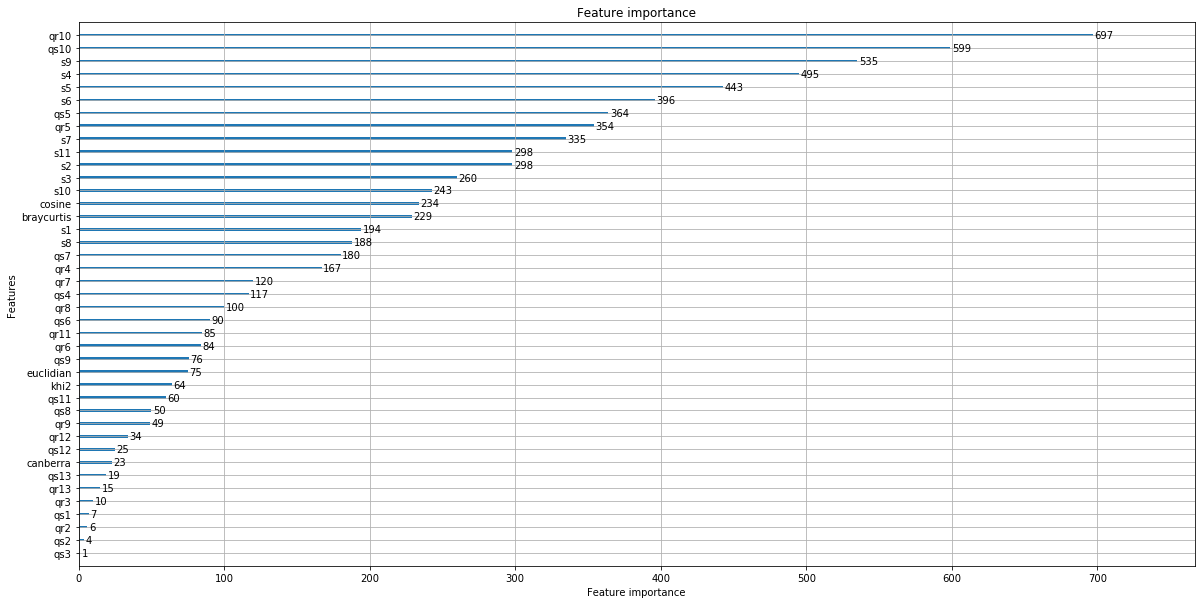

In [37]:

plt.rcParams['figure.figsize'] = [20, 10]
lightgbm.plot_importance(model)

In [38]:
#model.save_model('lgbm_distance.txt')

soft = model.predict(X_test)

print('Fininshed Training')
soft

Fininshed Training


array([0.03252096, 0.03252096, 0.03252096, ..., 0.03252096, 0.04047605,
       0.03252096])

In [39]:

yvalid = soft

In [40]:
N = np.sum(y_test == 0).values
P = np.sum(y_test == 1).values



In [41]:

yvalid_scoreordered = y_test.values[np.argsort(yvalid)]


FP = 0.0
TP = 0.0
val = 0
print(N)
print(P)
for i in range(len(y_test) - 1, -1, -1):        
    if (yvalid_scoreordered[i] == 1):
        TP = TP + 1
    else:
        FP = FP + 1
        #print(X_test[cols].iloc(i))
    if (FP / N > 10**-4):
        FP = FP - 1
        break
print("For the smallest FPR <= 10^-4 (i.e., ", FP / N, ") TPR = ", TP / P, ".", sep = "")

[3012122]
[222091]
For the smallest FPR <= 10^-4 (i.e., [9.99295513e-05]) TPR = [0.87299801].


In [33]:
# Load test data
xtest = pd.read_csv('data/xtest_challenge.csv')
xtest["canberra"]=distance_canberra_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["cosine"]=distance_cosine_mat(xtest[cols_qr].values, xtest[cols_qs].values)
xtest["khi2"]=distance_khi2_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["braycurtis"]=distance_braycurtis_mat(xtest[cols_qr].values,xtest[cols_qs].values)
xtest["euclidian"]=distance_eucl_mat(xtest[cols_qr].values,xtest[cols_qs].values)

In [35]:
# Classify the provided test data
ytest = model.predict(xtest.values)
print(ytest.shape)
np.savetxt('ytest_lbgm_distance_s1.csv', ytest, fmt = '%1.15f', delimiter=',')

(3768311,)
